In [1]:
from tensorflow import keras
import tensorflow as tf
import gc

In [2]:
from CustomLayers import *
from GS_composer import *
from Functions import *
from ClassModel import *

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [80]:
#user_profile = "E:/learning resource/"
user_profile = "C:/Users/uqcche32/"
user_profile = "D:/"

Model_series = "MultiLevel/MultiLevel_1Head16eb16LC10LB1AB_EpipcaIndex_2leakyRelu"
Model_series = "MultiLevel_Attention_1Head16eb16LC1LB_1000BayesRsSNP_v2_mse_pcaIndex"
Model_path = user_profile+"OneDrive - The University of Queensland/PhD/HPC_Results/Sugarcane_disease/ML/" + Model_series
Model_path = user_profile+"OneDrive - The University of Queensland/PhD/HPC_Results/Sugarcane_disease/ML/MultiLevel/PIP_attention/Densely/" + Model_series
#Model_path = "F:/PhD_Notebook/Code/ML_composer/"
#Model_path = "H:/ML_archive/PIP_attention/v3_beforeSoftmax"
#Model_path = "E:/learning resource/OneDrive - The University of Queensland/PhD/HPC_Results/Sugarcane_disease/ML/"

In [81]:
from keras import backend as K

In [82]:
print(tf.__version__)

2.9.1


In [83]:
model_folder = "smut_MultiLevelAttention_2"

#model_folder = "test_model"
full_path = Model_path + "/" + model_folder
print(full_path)
model = keras.models.load_model(full_path)

D:/OneDrive - The University of Queensland/PhD/HPC_Results/Sugarcane_disease/ML/MultiLevel/PIP_attention/Densely/MultiLevel_Attention_1Head16eb16LC1LB_1000BayesRsSNP_v2_mse_pcaIndex/smut_MultiLevelAttention_2


ValueError: Exception encountered when calling layer "multi_level__block_attention" (type MultiLevel_BlockAttention).

Cannot call custom layer multi_level__block_attention of type <class 'keras.saving.saved_model.load.MultiLevel_BlockAttention'>, because the call function was not serialized to the SavedModel.Please try one of the following methods to fix this issue:

(1) Implement `get_config` and `from_config` in the layer/model class, and pass the object to the `custom_objects` argument when loading the model. For more details, see: https://www.tensorflow.org/guide/keras/save_and_serialize

(2) Ensure that the subclassed model or layer overwrites `call` and not `__call__`. The input shape and dtype will be automatically recorded when the object is called, and used when saving. To manually specify the input shape/dtype, decorate the call function with `@tf.function(input_signature=...)`.

Call arguments received by layer "multi_level__block_attention" (type MultiLevel_BlockAttention):
  • unused_args=('tf.Tensor(shape=(None, 1001, 16), dtype=float32)',)
  • unused_kwargs=<class 'inspect._empty'>

In [84]:
model_folder = "smut_MultiLevelAttention_2"

#model_folder = "test_model"
full_path = Model_path + "/" + model_folder
print(full_path)
model = keras.models.load_model(full_path+".h5",custom_objects={"MultiLevel_BlockAttention": MultiLevel_BlockAttention,
                                                         "OrdinalOutputLayer":OrdinalOutputLayer,
                                                         "GroupedLocallyConnectedLayer":GroupedLocallyConnectedLayer})
#model = keras.models.load_model(full_path,custom_objects={"MultiLevel_BlockAttention": MultiLevel_BlockAttention,
#                                                         "OrdinalOutputLayer":OrdinalOutputLayer,
#                                                         "GroupedLocallyConnectedLayer":GroupedLocallyConnectedLayer})

D:/OneDrive - The University of Queensland/PhD/HPC_Results/Sugarcane_disease/ML/MultiLevel/PIP_attention/Densely/MultiLevel_Attention_1Head16eb16LC1LB_1000BayesRsSNP_v2_mse_pcaIndex/smut_MultiLevelAttention_2
(None, 1001, 16)
from buiild


In [85]:
model.summary()
#model = keras.Model(inputs=input1, outputs=QV_output)
model.compile(optimizer="RMSprop", loss="mean_squared_error")

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_layer_1 (InputLayer)     [(None, 1000, 1)]    0           []                               
                                                                                                  
 zero_padding1d (ZeroPadding1D)  (None, 1001, 1)     0           ['input_layer_1[0][0]']          
                                                                                                  
 locally_connected1d (LocallyCo  (None, 1001, 16)    16016       ['zero_padding1d[0][0]']         
 nnected1D)                                                                                       
                                                                                                  
 dense (Dense)                  (None, 1001, 16)     272         ['locally_connected1d[0][0]']

In [124]:

keras.utils.plot_model(model,to_file=full_path + "model.png")
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_layer_1 (InputLayer)     [(None, 1000, 1)]    0           []                               
                                                                                                  
 zero_padding1d (ZeroPadding1D)  (None, 1001, 1)     0           ['input_layer_1[0][0]']          
                                                                                                  
 locally_connected1d (LocallyCo  (None, 1001, 16)    16016       ['zero_padding1d[0][0]']         
 nnected1D)                                                                                       
                                                                                                  
 dense (Dense)                  (None, 1001, 16)     272         ['locally_connected1d[0][0]']

A test variable of SNP array based on the freq of alleles.

In [125]:

#data = np.ones((1, 1000, 1))
test_filename = user_profile+"OneDrive - The University of Queensland/PhD/data/sugarcane_disease/sugarcane_disease_1000_v2_smut.ped"
#test_filename = user_profile+"OneDrive - The University of Queensland/PhD/data/sugarcane_disease/sugarcane_disease.freqV1.ped"
data = pd.read_csv(test_filename,header=None,sep="\t").iloc[:,6:]
data=np.expand_dims(data,axis=-1)
print(np.expand_dims(data[1,:],axis=0).shape)

(1000, 1, 1)


Model predict via test freq data

In [126]:
model.predict(np.expand_dims(data[1,:],axis=0))

1/1 [==============================] - 0s 137ms/step


c:\Users\70651\.conda\envs\DL\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


array([[-7.752022]], dtype=float32)

Extract layer weights and outputs from the model

In [65]:
intermediate_layer_model = tf.keras.Model(inputs=model.input,
                                         outputs=model.layers[6].output)
print(model.layers[6].name )

conv1d


In [66]:
intermediate_output = intermediate_layer_model.predict(data)

1/1 [==============================] - 0s 145ms/step


In [67]:
attention = intermediate_output
attention = K.expand_dims(attention,axis=1)
print(attention.shape)
print(attention.shape)
#plt.scatter(x=np.tile(np.arange(0,26080),1),y=abs(mean_SNP_attention))
#plt.scatter(x=np.tile(np.arange(0,1001),1),y=abs(attention))


(1, 1, 1001, 1)
(1, 1, 1001, 1)


In [68]:
x,y,z,d = attention.shape
attention = tf.reshape(attention,(z,x,d))

In [69]:
mean_SNP_attention = attention
#mean_SNP_attention = tf.reduce_mean(SNP_attention,axis=2)
mean_SNP_attention.shape
#mean_SNP_attention =np.array(tf.reshape(mean_SNP_attention,(26080,))) #np.array(tf.reshape(mean_SNP_attention,(26080*32,)))
mean_SNP_attention =np.array(tf.reshape(mean_SNP_attention,(z,d)))

In [70]:
import matplotlib.pyplot as plt
import math

In [71]:
np.mean(mean_SNP_attention)
#mean_SNP_attention = tf.reduce_sum(mean_SNP_attention,axis=-1)

-9.725016

In [72]:
print(mean_SNP_attention.shape)
print(mean_SNP_attention[-1])
print(os.getcwd())

(1001, 1)
[-2.3855839]
d:\PhD_Notebook\Code\ML_composer\Model_analysis


(1001, 1, 1)


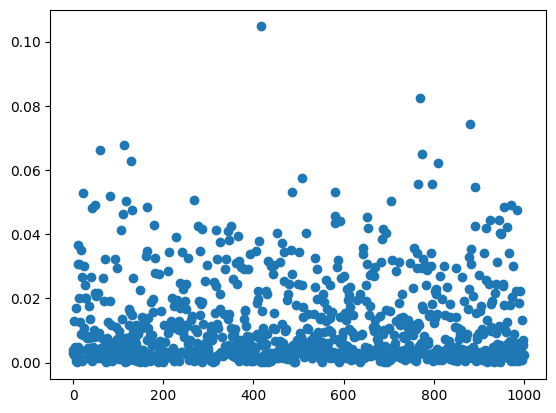

In [73]:
print(attention.shape)
#plt.scatter(x=np.tile(np.arange(0,26080),1),y=abs(mean_SNP_attention))
plt.scatter(x=np.tile(np.arange(0,z),d),y=abs(mean_SNP_attention/z))
#np.savetxt("smut1_attentions_freq.csv",mean_SNP_attention,delimiter="\t")

flatten
1/1 [==============================] - 0s 141ms/step
(1, 1001, 1)


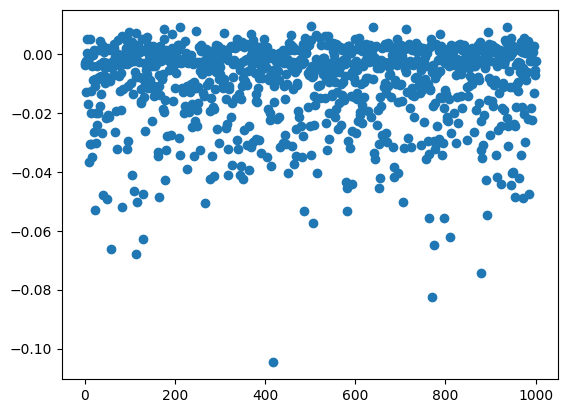

In [77]:
intermediate_conv1 = tf.keras.Model(inputs=model.input,
                                         outputs=model.layers[6].output)
print(model.layers[9].name)
conv_attention = intermediate_conv1.predict(data)/z
#conv_attention = K.expand_dims(intermediate_conv1_output,axis=1)
print(conv_attention.shape)
#conv_attention =np.array(tf.reshape(conv_attention,(1001,d)))
#np.savetxt("smut1_conv1.csv",tf.reduce_mean(conv_attention,axis=-1),delimiter="\t")
#plt.scatter(x=np.tile(np.arange(0,1001),1),y=np.square(tf.reduce_mean(conv_attention,axis=-1)))
plt.scatter(x=np.tile(np.arange(0,z),d),y=conv_attention)

In [142]:
conv_record = None
for v in range(1,6):
    Model_path = "H:/ML_archive/PIP_attention/v"+str(v)+"_beforeSoftmax"
    model_folder = "smut_MultiLevelAttention_"+str(v)

    full_path = Model_path + "/" + model_folder
    print(full_path)
    model = keras.models.load_model(full_path,custom_objects={"MultiLevel_BlockAttention": MultiLevel_BlockAttention,
                                                         "OrdinalOutputLayer":OrdinalOutputLayer,
                                                         "GroupedLocallyConnectedLayer":GroupedLocallyConnectedLayer})
    
    model.summary()
    model.compile(optimizer="RMSprop", loss="mean_squared_error")

    test_filename = user_profile+"OneDrive - The University of Queensland/PhD/data/sugarcane_disease/sugarcane_disease_1000.freqV1.ped"
    #test_filename = user_profile+"OneDrive - The University of Queensland/PhD/data/sugarcane_disease/sugarcane_disease.freqV1.ped"
    data = pd.read_csv(test_filename,header=None,sep="\t").iloc[:,6:]
    data=np.expand_dims(data,axis=-1)
    print(data.shape)
    intermediate_conv1 = tf.keras.Model(inputs=model.input,
                                         outputs=model.layers[6].output)
    print(model.layers[6].name)
    conv_attention = intermediate_conv1.predict(data)
    #conv_attention = K.expand_dims(intermediate_conv1_output,axis=1)
    print(conv_attention.shape)
    #conv_attention =np.array(tf.reshape(conv_attention,(1001,d)))
    conv1_result = tf.reduce_mean(conv_attention,axis=-1)
    if conv_record is None:
        conv_record = conv1_result
    else:
        #stack new line to the record
        conv_record = np.vstack((conv_record,conv1_result))
    print(conv_record.shape)
np.savetxt("smut1_conv1_5folds.csv",conv_record,delimiter="\t")
#plt.scatter(x=np.tile(np.arange(0,1001),1),y=np.square(tf.reduce_mean(conv_attention,axis=-1)))
    


H:/ML_archive/PIP_attention/v1_beforeSoftmax/smut_MultiLevelAttention_1
(None, 1001, 16)
from buiild
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_layer_1 (InputLayer)     [(None, 1000, 1)]    0           []                               
                                                                                                  
 zero_padding1d (ZeroPadding1D)  (None, 1001, 1)     0           ['input_layer_1[0][0]']          
                                                                                                  
 locally_connected1d (LocallyCo  (None, 1001, 16)    16016       ['zero_padding1d[0][0]']         
 nnected1D)                                                                                       
                                                                                            

c:\Users\70651\.conda\envs\DL\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


(1, 1001, 1)
(1, 1001)
H:/ML_archive/PIP_attention/v2_beforeSoftmax/smut_MultiLevelAttention_2
(None, 1001, 16)
from buiild
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_layer_1 (InputLayer)     [(None, 1000, 1)]    0           []                               
                                                                                                  
 zero_padding1d (ZeroPadding1D)  (None, 1001, 1)     0           ['input_layer_1[0][0]']          
                                                                                                  
 locally_connected1d (LocallyCo  (None, 1001, 16)    16016       ['zero_padding1d[0][0]']         
 nnected1D)                                                                                       
                                                                     

(1001, 1)


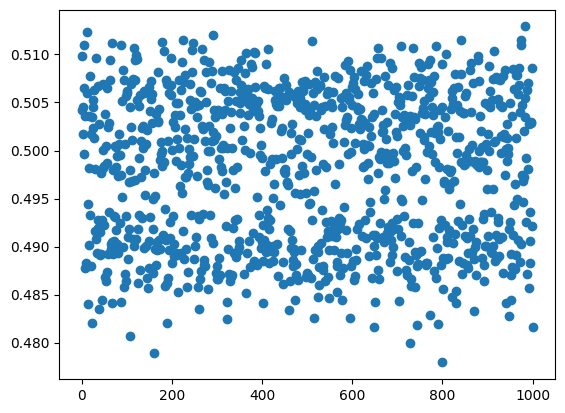

In [63]:
print(mean_SNP_attention.shape)
#plt.scatter(x=np.tile(np.arange(0,26080),1),y=abs(mean_SNP_attention))
plt.scatter(x=np.tile(np.arange(0,1001),d),y=mean_SNP_attention)

In [26]:
epi_weight = model.layers[4].get_weights()
#epi_weight[3].shape
channel_dense_weight = model.layers[5].get_weights()
print(channel_dense_weight[0].shape)
print(os.getcwd())

(16, 16)
d:\PhD_Notebook\Code\ML_composer


(1001, 1001)
dense
(16, 16)
1/1 [==============================] - 0s 132ms/step
(1, 1001, 16)
(1001, 16)
(1001, 16)
tf.Tensor(0.2982972, shape=(), dtype=float32)


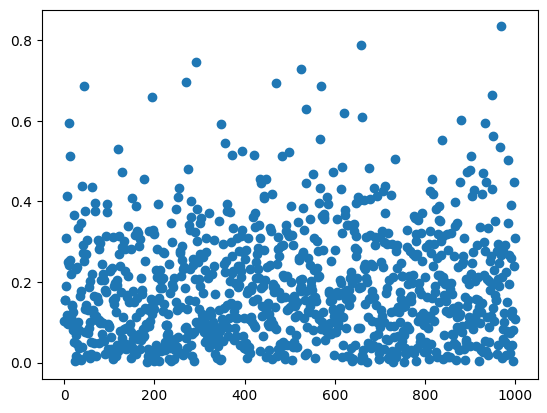

(1001,)


In [78]:

print(epi_weight[3].shape)
print(model.layers[3].name)
densely_weights = model.layers[5].get_weights()
print(densely_weights[0].shape)
intermediate_padding = tf.keras.Model(inputs=model.input,
                                         outputs=model.layers[3].output)
intermediate_padding_out = intermediate_padding.predict(data)
print(intermediate_padding_out.shape)
channels = intermediate_padding_out.shape[-1]
intermediate_padding_out = tf.reshape(intermediate_padding_out,(z,channels))
print(intermediate_padding_out.shape)
epi_freq = tf.matmul(
    tf.multiply(
        epi_weight[3],tf.nn.sigmoid(
            tf.matmul(
                intermediate_padding_out,intermediate_padding_out,transpose_b=True)/np.sqrt(z)
                )
                ),intermediate_padding_out)
print(epi_freq.shape)
print(epi_freq[0][-1])
after_dense = tf.matmul(epi_freq,densely_weights[0])
#plt.scatter(x=np.tile(np.arange(0,26080),1),y=abs(mean_SNP_attention))
plt.scatter(x=np.tile(np.arange(0,z),1),y=abs(tf.reduce_mean(epi_freq,axis=1)))
plt.show()
#np.savetxt("smut1_epi1.csv",abs(tf.reduce_mean(after_dense,axis=-1))/2,delimiter="\t")
print(abs(tf.reduce_mean(after_dense,axis=-1)).shape)

C:\Users\70651\AppData\Local\Temp\ipykernel_25028\1181321575.py:2: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("spring").copy()
  cmap.set_bad(color='white')


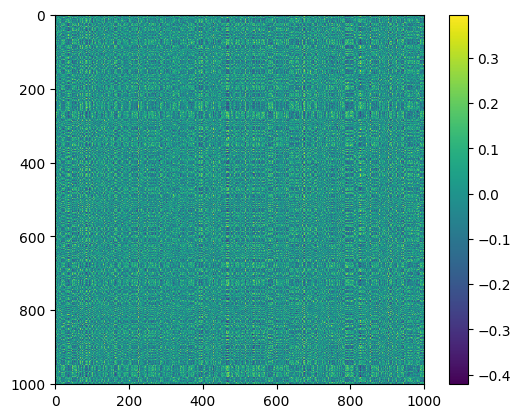

In [30]:
cmap = plt.cm.spring  # Can be any colormap that you want after the cm
cmap.set_bad(color='white')
plt.imshow(epi_weight[3], interpolation='nearest')
plt.colorbar()
plt.show()

(1001,)


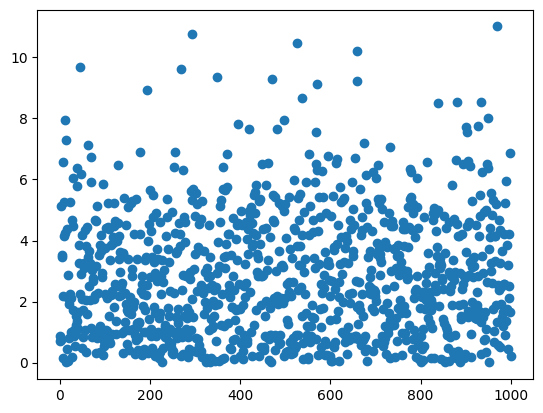

In [31]:
epi_sum = tf.reduce_sum(epi_weight[3],axis=1)
print(epi_sum.shape)
plt.scatter(x=np.tile(np.arange(0,1001),1),y=abs(epi_sum))

In [ ]:
def export_attention_score_by_trait(filename,trait,val):
    model = keras.models.load_model(filename,custom_objects={"MultiHead_QKV_BlockAttention": MultiHead_QKV_BlockAttention,
                                                         "SNPBlockLayer":SNPBlockLayer})
    model.summary()
    #model = keras.Model(inputs=input1, outputs=QV_output)
    model.compile(optimizer="RMSprop", loss="mean_squared_error")
    test_filename = user_profile+"OneDrive - The University of Queensland/PhD/data/sugarcane_disease/sugarcane_disease.freqV1.ped"
    data = pd.read_csv(test_filename,header=None,sep="\t").iloc[:,6:]
    data=np.expand_dims(data,axis=-1)
    print(data.shape)
    intermediate_layer_model = tf.keras.Model(inputs=model.input,
                                         outputs=model.get_layer('add_3').output)
    intermediate_output = intermediate_layer_model.predict(data)
    attention = intermediate_output[0]
    attention = K.expand_dims(attention,axis=1)
    print(attention.shape)
    
    LNN_weight = model.layers[2].get_weights()
    SNP_attention = tf.multiply(attention,LNN_weight[0])
    SNP_attention = np.array(tf.reshape(SNP_attention,(32,26080)))
    SNP_attention = pd.DataFrame(SNP_attention,columns=list(range(1,SNP_attention.shape[1]+1)))
    SNP_attention.shape
    SNP_attention.insert(0,'Channel',range(1,33))
    SNP_attention.insert(0,'Val',val)
    SNP_attention.insert(0,"Trait",trait)
    
    SNP_attention = SNP_attention.values.tolist()
    #mean_SNP_attention = [trait,val]+list(np.array(tf.reshape(mean_SNP_attention,(26080,))))
    #mean_SNP_attention = pd.DataFrame([trait,val]+list(mean_SNP_attention),columns=[trait,val]+list(range(1,length(mean_SNP_attention))))
    model = None
    keras.backend.clear_session()
    gc.collect()
    
    return SNP_attention
    
    

In [ ]:
def export_LD_attention_score_by_trait(filename,trait,val):
    model = keras.models.load_model(filename,custom_objects={"MultiHead_QKV_BlockAttention": MultiHead_QKV_BlockAttention,
                                                         "SNPBlockLayer":SNPBlockLayer})
    model.summary()
    #model = keras.Model(inputs=input1, outputs=QV_output)
    model.compile(optimizer="RMSprop", loss="mean_squared_error")
    test_filename = user_profile+"OneDrive - The University of Queensland/PhD/data/sugarcane_disease/sugarcane_disease.freqV1.ped"
    data = pd.read_csv(test_filename,header=None,sep="\t").iloc[:,6:]
    data=np.expand_dims(data,axis=-1)
    print(data.shape)
    intermediate_layer_model = tf.keras.Model(inputs=model.input,
                                         outputs=model.get_layer('multi_head_qkv__block_attention').output)
    intermediate_output = intermediate_layer_model.predict(data)
    attention = intermediate_output[0]
    attention = K.expand_dims(attention,axis=1)
    print(attention.shape)
    
    #LNN_weight = model.layers[2].get_weights()
    #SNP_attention = tf.multiply(attention,LNN_weight[0])
    LD_attention = np.array(tf.reshape(attention,(32,2608)))
    LD_attention = pd.DataFrame(LD_attention,columns=list(range(1,LD_attention.shape[1]+1)))

    LD_attention.insert(0,'Channel',range(1,33))
    LD_attention.insert(0,'Val',val)
    LD_attention.insert(0,"Trait",trait)
    
    LD_attention = LD_attention.values.tolist()
    #mean_SNP_attention = [trait,val]+list(np.array(tf.reshape(mean_SNP_attention,(26080,))))
    #mean_SNP_attention = pd.DataFrame([trait,val]+list(mean_SNP_attention),columns=[trait,val]+list(range(1,length(mean_SNP_attention))))
    model = None
    keras.backend.clear_session()
    gc.collect()
    
    return LD_attention

In [ ]:
Model_path = user_profile+"OneDrive - The University of Queensland/PhD/HPC_Results/Sugarcane_disease/ML/1Head_RealForm32_32LocalB/"
records = []
for trait in ["smut","pachy"]:
    for val in range(1,6):
        filename = Model_path + trait + "_MultiHeadAttentionLNN_"+str(val)
        record = export_attention_score_by_trait(filename,trait,val)
        records.append(record)


In [ ]:
recordss = []
for i in records:
    for j in i:
        recordss.append(j)
records_df = pd.DataFrame(recordss,columns=["Trait","Val","Channel"]+list(range(1,26081)))
output_path = Model_path + "Attention_block_Normscore.csv"
records_df.to_csv(output_path,sep="\t",index=False)

In [ ]:
len(recordss[0])

In [ ]:
records.insert(0,"Val", #columns.values[0:2] = ["Trait","Val"]
output_path = Model_path + "Attention_score.csv"
records.to_csv(output_path,sep="\t",index=False)

In [ ]:
records_df.describe()

In [ ]:
intermediate_layer_model = tf.keras.Model(inputs=model.input,
                                         outputs=model.get_layer('multi_head_qkv__block_attention').output)
intermediate_output = intermediate_layer_model.predict(data)
attention = intermediate_output[0]
attention = K.expand_dims(attention,axis=1)
print(attention.shape)
pd.DataFrame(np.array(tf.reshape(attention,(32,2608)))).describe()

In [ ]:
keras.backend.clear_session()
gc.collect()